Confusion Matrix:
[[19  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



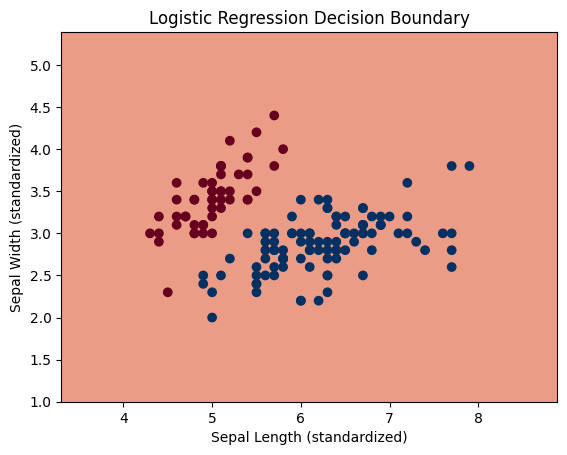

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # We'll use only the first two features for simplicity
y = (iris.target != 0) * 1 # Convert target labels to binary (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

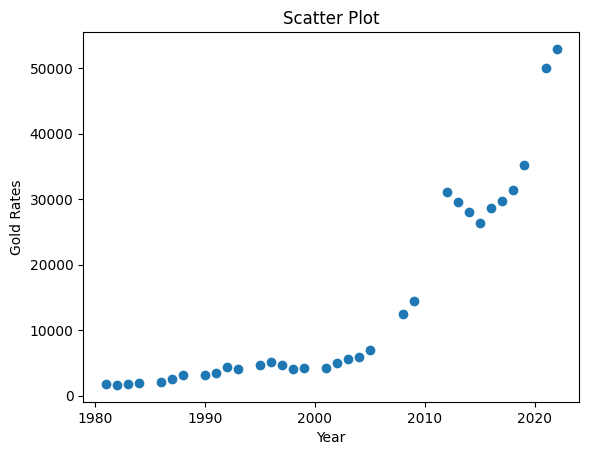

Degree: 1, RMSE: 7802.451050353847
Degree: 2, RMSE: 3644.4294681401716
Degree: 3, RMSE: 3381.03538775858
Degree: 4, RMSE: 3382.2907093574076
Degree: 5, RMSE: 3383.6642718493213
Best polynomial degree: 3


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('gold_silver.csv')

# Split data into features (X) and target (Y)
X = df[['Year']]
Y = df['Gold Rates']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scatter plot
plt.scatter(X_train, Y_train, label='Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Rates')
plt.title('Scatter Plot')
plt.show()

# Define a range of polynomial degrees to try
degrees = [1, 2, 3, 4, 5]

rmse_scores = []

for degree in degrees:
    # Create polynomial feature transformer
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    # Predict using the model
    Y_pred = model.predict(X_test_poly)
    
    # Calculate mean squared error
    rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))
    rmse_scores.append(rmse)

    print(f"Degree: {degree}, RMSE: {rmse}")

# Find the best degree with the lowest MSE
best_degree = degrees[np.argmin(rmse_scores)]
print("Best polynomial degree:", best_degree)


Accuracy: 0.4444444444444444
Confusion Matrix:
[[0 5]
 [0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       0.44      1.00      0.62         4

    accuracy                           0.44         9
   macro avg       0.72      0.50      0.31         9
weighted avg       0.75      0.44      0.27         9



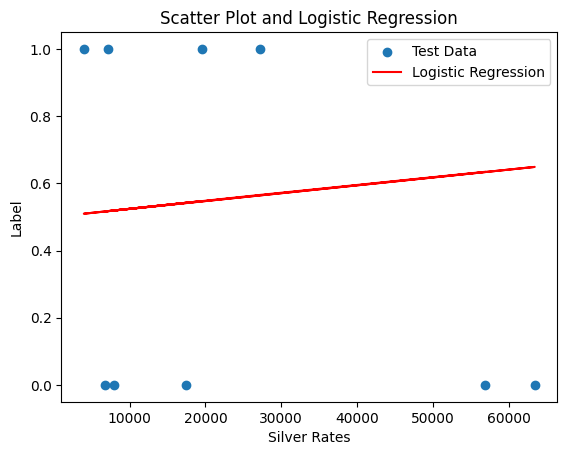

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
df = pd.read_csv('gold_silver.csv')

# Split data into features (X) and target (Y)
X = df[['Silver Rates']]  # Independent variable
Y = df['Label']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred, zero_division=1)  # Set zero_division parameter

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Scatter plot
plt.scatter(X_test, Y_test, label='Test Data')
plt.xlabel('Silver Rates')
plt.ylabel('Label')
plt.title('Scatter Plot and Logistic Regression')
plt.plot(X_test, model.predict_proba(X_test)[:, 1], color='red', label='Logistic Regression')
plt.legend()
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math

# Load data
df = pd.read_csv('gold_silver.csv')

# Split data into features (x) and target (y)
x = df[['Year', 'Gold Rates']]
y = df['Silver Rates'] 

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Create polynomial feature transformer with degree=3
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create and fit the sklearn Linear Regression model
reg = LinearRegression()
reg.fit(x_train_poly, y_train)

# Predict using the sklearn model
y_pred = reg.predict(x_test_poly)

# Calculate errors and RMSE using manually predicted values
error_manual = sum(y_pred - y_test) / len(y_test)
mse_manual = sum((y_pred - y_test) ** 2) / len(y_test)
rmse_manual = math.sqrt(mse_manual)
print('Error:', error_manual)
print('MSE:', mse_manual)
print('RMSE:', rmse_manual)

# Manual coefficient calculation
X1 = sum(x_train['Year'])
X2 = sum(x_train['Gold Rates'])
X12 = sum((x_train['Year']) ** 2)
X22 = sum((x_train['Gold Rates']) ** 2)
X1y = sum((x_train['Year']) * y_train)
X2y = sum((x_train['Gold Rates']) * y_train)
X1X2 = sum((x_train['Year']) * (x_train['Gold Rates']))
Y = sum(y_train)
n = len(x_train)

x1 = X12 - (X1 ** 2 / n)
x2 = X22 - (X2 ** 2 / n)
x1y = X1y - ((X1 * Y) / n)
x2y = X2y - ((X2 * Y) / n)
x1x2 = X1X2 - ((X1 * X2) / n)

b1 = ((x2 * x1y) - (x1x2 * x2y)) / ((x1 * x2) - (x1x2 ** 2))
b2 = ((x1 * x2y) - (x1x2 * x1y)) / ((x1 * x2) - (x1x2 ** 2))
b0 = (Y / n) - b1 * (X1 / n) - b2 * (X2 / n)

# Predict using the manually calculated coefficients
year_2024 = 2024
gold_price_2024 = 29054.52269729  
silver_price_2024 = b0 + b1 * year_2024 + b2 * gold_price_2024
print('Predicted price of silver in 2024:', silver_price_2024)


Error: -2821.294219123572
MSE: 23881641.32686139
RMSE: 4886.8846238540755
Predicted price of silver in 2024: 41236.16986658872


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
df = pd.read_csv('gold_silver.csv')

# Split data into features (X) and target (Y)
X = df[['Gold Rates', 'Year']]  # Independent variables
Y = df['Label']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred, zero_division=1)  # Set zero_division parameter

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.4444444444444444
Confusion Matrix:
[[2 3]
 [2 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.40      0.50      0.44         4

    accuracy                           0.44         9
   macro avg       0.45      0.45      0.44         9
weighted avg       0.46      0.44      0.44         9

